In [4]:
import pprint
import pandas as pd


In [1]:

from datasets import load_dataset
dataset2 = load_dataset(
   'grail_qa')

Using custom data configuration default
Reusing dataset grail_qa (/Users/kinga/.cache/huggingface/datasets/grail_qa/default/0.0.0/2be99c6902e842f3ba87dd36fa96a2236206438ebb67c5e5464a36e4049fd3fb)


In [2]:
dataset2

DatasetDict({
    train: Dataset({
        features: ['qid', 'question', 'answer', 'function', 'num_node', 'num_edge', 'graph_query', 'sparql_query', 'domains', 'level', 's_expression'],
        num_rows: 44337
    })
    validation: Dataset({
        features: ['qid', 'question', 'answer', 'function', 'num_node', 'num_edge', 'graph_query', 'sparql_query', 'domains', 'level', 's_expression'],
        num_rows: 6763
    })
    test: Dataset({
        features: ['qid', 'question', 'answer', 'function', 'num_node', 'num_edge', 'graph_query', 'sparql_query', 'domains', 'level', 's_expression'],
        num_rows: 13231
    })
})

In [5]:
df2 = pd.concat(\
      [ pd.DataFrame(dataset2['train']),  pd.DataFrame(dataset2['test'])],\
      ignore_index=True)


In [6]:
df2.head()

,qid,question,answer,function,num_node,num_edge,graph_query,sparql_query,domains,level,s_expression
0,2101535001000,oxybutynin chloride 5 extended release film co...,"{'answer_type': ['Entity', 'Entity'], 'answer_...",none,2,1,"{'nodes': {'nid': [0, 1], 'node_type': ['class...",PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,[medicine],,(AND medicine.routed_drug (JOIN medicine.route...
1,2100954014000,the type single-sex school are in which instit...,"{'answer_type': ['Entity', 'Entity', 'Entity',...",none,2,1,"{'nodes': {'nid': [0, 1], 'node_type': ['class...",PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,[education],,(AND education.educational_institution (JOIN e...
2,3206374001000,the leaders of the earliest established religi...,"{'answer_type': ['Entity'], 'answer_argument':...",argmin,3,2,"{'nodes': {'nid': [0, 1, 2], 'node_type': ['cl...",PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,[religion],,(ARGMIN religion.religious_leadership_title (J...
3,2100735000000,"on 07/01/1970, which warship v1.1 was hit?","{'answer_type': ['Entity'], 'answer_argument':...",none,2,1,"{'nodes': {'nid': [0, 1], 'node_type': ['class...",PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,[user.patrick.default_domain],,(AND user.patrick.default_domain.warship_v1_1 ...
4,2102770001000,what is the language regulator of basque?,"{'answer_type': ['Entity'], 'answer_argument':...",none,2,1,"{'nodes': {'nid': [0, 1], 'node_type': ['class...",PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,[language],,(AND language.language_regulator (JOIN languag...


In [7]:
df2.columns

Index(['qid', 'question', 'answer', 'function', 'num_node', 'num_edge',
       'graph_query', 'sparql_query', 'domains', 'level', 's_expression'],
      dtype='object')

In [8]:
df2 = df2.drop(columns = ['qid', 'function', 'num_node', 'num_edge',
       'graph_query', 'sparql_query','level', 's_expression'])

In [9]:
df2.head()

,question,answer,domains
0,oxybutynin chloride 5 extended release film co...,"{'answer_type': ['Entity', 'Entity'], 'answer_...",[medicine]
1,the type single-sex school are in which instit...,"{'answer_type': ['Entity', 'Entity', 'Entity',...",[education]
2,the leaders of the earliest established religi...,"{'answer_type': ['Entity'], 'answer_argument':...",[religion]
3,"on 07/01/1970, which warship v1.1 was hit?","{'answer_type': ['Entity'], 'answer_argument':...",[user.patrick.default_domain]
4,what is the language regulator of basque?,"{'answer_type': ['Entity'], 'answer_argument':...",[language]


In [10]:
df2['answer_entity_name'] = df2.answer.apply(lambda x: x['entity_name'])

In [11]:
df2.head()

,question,answer,domains,answer_entity_name
0,oxybutynin chloride 5 extended release film co...,"{'answer_type': ['Entity', 'Entity'], 'answer_...",[medicine],"[Oxybutynin Oral, Oxybutynin Chloride Oral]"
1,the type single-sex school are in which instit...,"{'answer_type': ['Entity', 'Entity', 'Entity',...",[education],"[École supérieure de jeunes filles, Penrhos Co..."
2,the leaders of the earliest established religi...,"{'answer_type': ['Entity'], 'answer_argument':...",[religion],[Pope]
3,"on 07/01/1970, which warship v1.1 was hit?","{'answer_type': ['Entity'], 'answer_argument':...",[user.patrick.default_domain],[USS Cobia]
4,what is the language regulator of basque?,"{'answer_type': ['Entity'], 'answer_argument':...",[language],[Euskaltzaindia]


In [13]:
df2.domains.tolist()

[['medicine'],
 ['education'],
 ['religion'],
 ['user.patrick.default_domain'],
 ['language'],
 ['food'],
 ['book'],
 ['medicine'],
 ['music'],
 ['astronomy'],
 ['people'],
 ['medicine'],
 ['architecture'],
 ['fictional_universe'],
 ['business'],
 ['visual_art'],
 ['business'],
 ['comic_books'],
 ['computer'],
 ['architecture'],
 ['comic_books'],
 ['media_common'],
 ['biology'],
 ['medicine'],
 ['meteorology'],
 ['book'],
 ['food'],
 ['education'],
 ['biology'],
 ['olympics'],
 ['religion'],
 ['food'],
 ['meteorology'],
 ['book'],
 ['meteorology'],
 ['tv'],
 ['education'],
 ['aviation'],
 ['travel'],
 ['organization'],
 ['travel'],
 ['tv'],
 ['business'],
 ['theater', 'architecture'],
 ['travel'],
 ['people'],
 ['book'],
 ['book'],
 ['spaceflight'],
 ['people'],
 ['architecture'],
 ['medicine'],
 ['basketball'],
 ['fictional_universe'],
 ['medicine'],
 ['geography'],
 ['medicine'],
 ['exhibitions'],
 ['internet'],
 ['education'],
 ['fictional_universe'],
 ['tv'],
 ['music'],
 ['archite

In [14]:
import functools
import operator

def functools_reduce_iconcat(a):
    return functools.reduce(operator.iconcat, a, [])

In [15]:
domains_flat = functools_reduce_iconcat(df2.domains.tolist())
list(set(domains_flat))

['military',
 'projects',
 'exhibitions',
 'tennis',
 'religion',
 'influence',
 'distilled_spirits',
 'education',
 'astronomy',
 'periodicals',
 'organization',
 'sports',
 'opera',
 'transportation',
 'book',
 'physics',
 'spaceflight',
 'time',
 'geology',
 'interests',
 'business',
 'digicams',
 'government',
 'freebase',
 'martial_arts',
 'chess',
 'user.jonathanwlowe.location',
 'theater',
 'engineering',
 'media_common',
 'boats',
 'language',
 'library',
 'fictional_universe',
 'food',
 'architecture',
 'automotive',
 'geography',
 'broadcast',
 'travel',
 'comic_strips',
 'user.patrick.default_domain',
 'common',
 'boxing',
 'skiing',
 'tv',
 'wine',
 'base.lightweight',
 'celebrities',
 'visual_art',
 'olympics',
 'internet',
 'amusement_parks',
 'dining',
 'type',
 'music',
 'comic_books',
 'zoos',
 'basketball',
 'royalty',
 'biology',
 'people',
 'ice_hockey',
 'soccer',
 'law',
 'cricket',
 'symbols',
 'fashion',
 'base.exoplanetology',
 'meteorology',
 'bicycles',
 'com

In [16]:
def checker(lst, keyword = 'medicine'):
    if keyword in lst:
        return True
    else: 
        return False

In [17]:
df2_medicine = df2[df2.domains.apply(lambda x : checker(x))].copy()
df2_medicine.loc[:,'domain'] = ['healthcare'] * df2_medicine.shape[0]
df2_medicine['subdomain'] = ['medicine'] * df2_medicine.shape[0]
df2_medicine = df2_medicine.drop(columns = ['answer', 'domains', 'answer_entity_name'])

In [18]:
df2_medicine

,question,domain,subdomain
0,oxybutynin chloride 5 extended release film co...,healthcare,medicine
7,the medical trials conducted on safety and eff...,healthcare,medicine
11,extended release liquid are a part of which dr...,healthcare,medicine
23,what is the manufactured drug form of us paten...,healthcare,medicine
51,what drug form shape is the manufactured drug ...,healthcare,medicine
...,...,...,...
44169,aminocaproic acid 1000 tablet has what drug ad...,healthcare,medicine
44173,name a medical trial that uses the same type o...,healthcare,medicine
44189,under which medical classification does syphil...,healthcare,medicine
44214,the canonical drug levodopa goes by what brand...,healthcare,medicine


In [19]:
df2_engineering = df2[df2.domains.apply(lambda x : checker(x, 'engineering'))].copy()
df2_engineering.loc[:,'domain'] = ['technology'] * df2_engineering.shape[0]
df2_engineering['subdomain'] = ['engineering'] * df2_engineering.shape[0]
df2_engineering = df2_engineering.drop(columns = ['answer', 'domains', 'answer_entity_name'])
df2_engineering

,question,domain,subdomain
82,gas turbine engine is a subcategory of which c...,technology,engineering
240,how big is the battery duracell aa battery?,technology,engineering
622,naugahyde is a child material class of what ma...,technology,engineering
888,what is the parent method of resource reservat...,technology,engineering
921,find all machines with 10 pistons,technology,engineering
...,...,...,...
43404,name reaction engines with a mass of 5393.0,technology,engineering
43576,name the engine which belongs to opposed-pisto...,technology,engineering
43918,which machines have 10 pistons?,technology,engineering
43967,what engine category has a sub-categories that...,technology,engineering


In [20]:
df2_aviation = df2[df2.domains.apply(lambda x : checker(x,'aviation'))].copy()
df2_aviation.loc[:,'domain'] = ['technology'] * df2_aviation.shape[0]
df2_aviation['subdomain'] = ['aviation'] * df2_aviation.shape[0]
df2_aviation = df2_aviation.drop(columns = ['answer', 'domains', 'answer_entity_name'])
df2_aviation

,question,domain,subdomain
37,bataan 1 and bataan 2 is what aircraft model?,technology,aviation
130,what kind of airport is the salt lake city int...,technology,aviation
219,what is the designator of simplifly deccan?,technology,aviation
253,what was the aviation incident which involved ...,technology,aviation
308,who is the owner of the b737 owned by the most...,technology,aviation
...,...,...,...
44110,djävlar anamma is which aircraft model?,technology,aviation
44164,which aircraft has the parent aircraft model o...,technology,aviation
44217,which aviation icident was caledonian airways ...,technology,aviation
44241,name the airport with the same type as yichun ...,technology,aviation


In [24]:
lda_df = pd.concat([df2_medicine, df2_aviation, df2_engineering], ignore_index=True)
lda_df

,question,domain,subdomain
0,oxybutynin chloride 5 extended release film co...,healthcare,medicine
1,the medical trials conducted on safety and eff...,healthcare,medicine
2,extended release liquid are a part of which dr...,healthcare,medicine
3,what is the manufactured drug form of us paten...,healthcare,medicine
4,what drug form shape is the manufactured drug ...,healthcare,medicine
...,...,...,...
3382,name reaction engines with a mass of 5393.0,technology,engineering
3383,name the engine which belongs to opposed-pisto...,technology,engineering
3384,which machines have 10 pistons?,technology,engineering
3385,what engine category has a sub-categories that...,technology,engineering


### Using https://github.com/priya-dwivedi/Deep-Learning/blob/master/topic_modeling/LDA_Newsgroup.ipynb

In [29]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

stemmer = SnowballStemmer("english")

In [30]:
STOPWORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [51]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/kinga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [192]:
lda_df['question_preprocessed'] = lda_df.question.apply(lambda x: preprocess(x)).tolist()

In [193]:
lda_df

,question,domain,subdomain,question_preprocessed
0,oxybutynin chloride 5 extended release film co...,healthcare,medicine,"[oxybutynin, chlorid, extend, releas, film, co..."
1,the medical trials conducted on safety and eff...,healthcare,medicine,"[medic, trial, conduct, safeti, effect, give, ..."
2,extended release liquid are a part of which dr...,healthcare,medicine,"[extend, releas, liquid, drug, formul]"
3,what is the manufactured drug form of us paten...,healthcare,medicine,"[manufactur, drug, form, patent]"
4,what drug form shape is the manufactured drug ...,healthcare,medicine,"[drug, form, shape, manufactur, drug, form, re..."
...,...,...,...,...
3382,name reaction engines with a mass of 5393.0,technology,engineering,"[reaction, engin, mass]"
3383,name the engine which belongs to opposed-pisto...,technology,engineering,"[engin, belong, oppos, piston, engin, categori]"
3384,which machines have 10 pistons?,technology,engineering,"[machin, piston]"
3385,what engine category has a sub-categories that...,technology,engineering,"[engin, categori, categori, categori, beardmor]"


In [194]:
processed_docs = []

for doc in lda_df.question:
    processed_docs.append(preprocess(doc))

In [195]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [196]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 chlorid
1 coat
2 drug
3 extend
4 film
5 ingredi
6 oxybutynin
7 releas
8 rout
9 tablet
10 author


In [197]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [198]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 2
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 2 ("drug") appears 1 time.
Word 3 ("extend") appears 1 time.
Word 7 ("releas") appears 1 time.
Word 23 ("formul") appears 1 time.
Word 24 ("liquid") appears 1 time.


In [156]:
bow_doc_x

[(2, 1), (3, 1), (7, 1), (23, 1), (24, 1)]

In [199]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [200]:

'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.046*"medic" + 0.032*"trial" + 0.025*"type" + 0.025*"diseas" + 0.017*"aircraft" + 0.017*"airport" + 0.016*"aviat" + 0.016*"condit" + 0.016*"model" + 0.015*"drug"


Topic: 1 
Words: 0.068*"drug" + 0.017*"formul" + 0.016*"aircraft" + 0.016*"medic" + 0.015*"effect" + 0.011*"type" + 0.011*"manufactur" + 0.011*"trial" + 0.011*"treatment" + 0.011*"activ"




In [201]:
unseendoc1 = "(By fortified, I refer to this definition: increase the nutritive value of (food) by adding vitamins.)Are there any differences between calcium supplements (as pills or tablets), and foods fortified with calcium (e.g., artificially added to products such as soy milk)? Isnt the solid calcium carbonate in supplements chemically the same as aqueous calcium carbonate in fortified drinks? Im lactose-intolerant. Alas, purely natural foods dont contain enough calcium for the Recommended Daily Intake."

In [202]:
unseendoc1

'(By fortified, I refer to this definition: increase the nutritive value of (food) by adding vitamins.)Are there any differences between calcium supplements (as pills or tablets), and foods fortified with calcium (e.g., artificially added to products such as soy milk)? Isnt the solid calcium carbonate in supplements chemically the same as aqueous calcium carbonate in fortified drinks? Im lactose-intolerant. Alas, purely natural foods dont contain enough calcium for the Recommended Daily Intake.'

In [208]:
unseen_doc1='(By \'fortified\', I refer to this definition: increase the nutritive value of (food) by adding vitamins.)\n\nAre there any differences between calcium supplements (as pills or tablets), and foods fortified with calcium (e.g., artificially added to products such as soy milk)? \n\nIsn\'t the solid calcium carbonate in supplements chemically the same as aqueous calcium carbonate in fortified drinks? I\'m lactose-intolerant. Alas, purely natural foods don\'t contain enough calcium for the Recommended Daily Intake. \n\n\n\nOptional Reading and Addendum: \n\n\n  1. WebMD: "Keep in mind that there\'s really not that much difference between getting calcium in a supplement and calcium in food."\n  "Calcium-fortified foods -- such as cereals, some juices, and soy milk -- are excellent sources of the mineral, experts tell WebMD."\n  \n  2. health.harvard.edu: An 8-ounce portion of off-the-shelf orange juice contains about 300 mg of calcium. The calcium in fortified soy milk also compares favorably to whole milk.\n  Breakfast cereals (which are also fortified) contain substantial amounts of calcium, especially when combined with low-fat milk.\n  A portion of oatmeal on its own contains just 100 mg of calcium. “But if you cut up some dried figs and add it to a bowl of oatmeal with milk, you easily get about half of what you need without having any supplements,” Dr. Hauser says.\n  \n  3. NY Times Blog,\u2003\u2003 4. NY Times\n\n\nFootnote: I originally posed this at Biology SE. \n'

In [210]:
print(unseen_doc1)

(By 'fortified', I refer to this definition: increase the nutritive value of (food) by adding vitamins.)

Are there any differences between calcium supplements (as pills or tablets), and foods fortified with calcium (e.g., artificially added to products such as soy milk)? 

Isn't the solid calcium carbonate in supplements chemically the same as aqueous calcium carbonate in fortified drinks? I'm lactose-intolerant. Alas, purely natural foods don't contain enough calcium for the Recommended Daily Intake. 



Optional Reading and Addendum: 


  1. WebMD: "Keep in mind that there's really not that much difference between getting calcium in a supplement and calcium in food."
  "Calcium-fortified foods -- such as cereals, some juices, and soy milk -- are excellent sources of the mineral, experts tell WebMD."
  
  2. health.harvard.edu: An 8-ounce portion of off-the-shelf orange juice contains about 300 mg of calcium. The calcium in fortified soy milk also compares favorably to whole milk.
  

In [211]:
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_doc1))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index)))

Score: 0.8729569911956787	 Topic: 0.068*"drug" + 0.017*"formul" + 0.016*"aircraft" + 0.016*"medic" + 0.015*"effect" + 0.011*"type" + 0.011*"manufactur" + 0.011*"trial" + 0.011*"treatment" + 0.011*"activ"
Score: 0.12704302370548248	 Topic: 0.046*"medic" + 0.032*"trial" + 0.025*"type" + 0.025*"diseas" + 0.017*"aircraft" + 0.017*"airport" + 0.016*"aviat" + 0.016*"condit" + 0.016*"model" + 0.015*"drug"


In [247]:
bow_vector

[(9, 1),
 (30, 1),
 (37, 12),
 (59, 1),
 (80, 1),
 (99, 5),
 (116, 2),
 (137, 4),
 (143, 1),
 (186, 1),
 (187, 4),
 (188, 1),
 (301, 1),
 (330, 2),
 (358, 1),
 (552, 1),
 (573, 1),
 (845, 2),
 (1063, 1),
 (1233, 1),
 (1415, 1),
 (1457, 2),
 (1486, 6),
 (1949, 1),
 (1952, 1),
 (2144, 2),
 (2704, 1)]

In [167]:
lda_model.print_topic(1)

'0.065*"medic" + 0.045*"trial" + 0.020*"type" + 0.019*"diseas" + 0.017*"condit" + 0.016*"airport" + 0.013*"treatment" + 0.011*"effect" + 0.009*"symptom" + 0.009*"drug"'

### Using https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [25]:
lda_df

,question,domain,subdomain
0,oxybutynin chloride 5 extended release film co...,healthcare,medicine
1,the medical trials conducted on safety and eff...,healthcare,medicine
2,extended release liquid are a part of which dr...,healthcare,medicine
3,what is the manufactured drug form of us paten...,healthcare,medicine
4,what drug form shape is the manufactured drug ...,healthcare,medicine
...,...,...,...
3382,name reaction engines with a mass of 5393.0,technology,engineering
3383,name the engine which belongs to opposed-pisto...,technology,engineering
3384,which machines have 10 pistons?,technology,engineering
3385,what engine category has a sub-categories that...,technology,engineering


In [26]:
# Load the regular expression library
import re
# Remove punctuation
lda_df['question_processed'] = \
lda_df['question'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
lda_df['question_processed'] = \
lda_df['question_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
lda_df

,question,domain,subdomain,question_processed
0,oxybutynin chloride 5 extended release film co...,healthcare,medicine,oxybutynin chloride 5 extended release film co...
1,the medical trials conducted on safety and eff...,healthcare,medicine,the medical trials conducted on safety and eff...
2,extended release liquid are a part of which dr...,healthcare,medicine,extended release liquid are a part of which dr...
3,what is the manufactured drug form of us paten...,healthcare,medicine,what is the manufactured drug form of us paten...
4,what drug form shape is the manufactured drug ...,healthcare,medicine,what drug form shape is the manufactured drug ...
...,...,...,...,...
3382,name reaction engines with a mass of 5393.0,technology,engineering,name reaction engines with a mass of 53930
3383,name the engine which belongs to opposed-pisto...,technology,engineering,name the engine which belongs to opposed-pisto...
3384,which machines have 10 pistons?,technology,engineering,which machines have 10 pistons
3385,what engine category has a sub-categories that...,technology,engineering,what engine category has a sub-categories that...


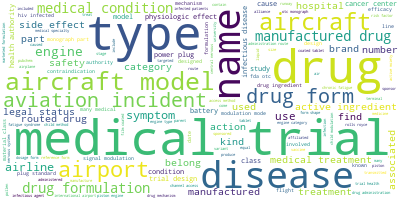

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(lda_df['question_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [31]:
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = lda_df.question_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /Users/kinga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['oxybutynin', 'chloride', 'extended', 'release', 'film', 'coated', 'tablet', 'ingredients', 'routed', 'drug']


In [32]:
data_words[0][:3]

['oxybutynin', 'chloride', 'extended']

In [33]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [34]:
from pprint import pprint
# number of topics
num_topics =2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"drug" + 0.032*"medical" + 0.015*"trial" + 0.012*"type" + '
  '0.012*"name" + 0.011*"aircraft" + 0.009*"manufactured" + 0.008*"disease" + '
  '0.007*"formulation" + 0.007*"condition"'),
 (1,
  '0.032*"drug" + 0.021*"medical" + 0.018*"type" + 0.017*"aircraft" + '
  '0.015*"model" + 0.013*"trial" + 0.012*"engine" + 0.009*"airport" + '
  '0.009*"disease" + 0.008*"form"')]


In [38]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/kinga/Documents/4_th_Brain/glg_sandbox/results/ldavis_prepared_'+str(num_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/kinga/Documents/4_th_Brain/glg_sandbox/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.029365  0.0       1        1  50.964204
1     -0.029365  0.0       2        1  49.035796, topic_info=             Term        Freq       Total Category  logprob  loglift
109      category   97.000000   97.000000  Default  30.0000  30.0000
2455       engine  169.000000  169.000000  Default  29.0000  29.0000
2432        model  221.000000  221.000000  Default  28.0000  28.0000
864    modulation   89.000000   89.000000  Default  27.0000  27.0000
2433      airport  142.000000  142.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
2468      airline   47.991768  123.848057   Topic2  -5.4205  -0.2354
63           name   56.531499  187.043783   Topic2  -5.2567  -0.4839
123         class   38.022678   81.427805   Topic2  -5.6533  -0.0489
173   formulation   43.533436  124.706564   Topic2  -5.5180  -0.3398
96     associated   36.327433   71.044594   Topic2  -5.6989   0.0419

[167 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
142       1  0.676874    active
142       2  0.318529    active
237       1  0.294113      aids
237       2  0.701346      aids
2430      1  0.395345  aircraft
...     ...       ...       ...
2906      2  0.768893   whitney
2464      1  0.153814    within
2464      2  0.845976    within
510       1  0.839970       zdv
510       2  0.209992       zdv

[240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])